## UniqueCodeError
Every file pandas reads by default with encoding = "utf-8". If this error occurs, just change the encoding to "latin". It should fix the problem.

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_030dd8fb0c25403690682aa8db070d64 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_030dd8fb0c25403690682aa8db070d64 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_030dd8fb0c25403690682aa8db070d64 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='DS19je96JUU_qTWYt6Je1l9CK7OJVG3Z_1WnlnS11_sd',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_030dd8fb0c25403690682aa8db070d64)

body = client_030dd8fb0c25403690682aa8db070d64.get_object(Bucket='sample-donotdelete-pr-itzcgurvbrwecb',Key='minwage.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head(10)


,Unnamed: 0,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,0,1968,Alabama,0.00000,0.00,1.15,8.55,1.15,8.55,34.8,...,0.00000,0.00,0.00000,0.00,NaN
1,1,1968,Alaska,2.10000,15.61,1.15,8.55,2.10,15.61,34.8,2.1,2.10000,15.61,2.10000,15.61,NaN
2,2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.8,18.72 - 26.40/wk(b),0.46800,3.48,0.66000,4.91,(b)
3,3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.8,1.25/day(b),0.15625,1.16,0.15625,1.16,(b)
4,4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.8,1.65(b),1.65000,12.26,1.65000,12.26,(b)
5,5,1968,Colorado,1.00000,7.43,1.15,8.55,1.15,8.55,34.8,1.00 - 1.25(b),1.00000,7.43,1.25000,9.29,(b)
6,6,1968,Connecticut,1.40000,10.41,1.15,8.55,1.40,10.41,34.8,1.4,1.40000,10.41,1.40000,10.41,NaN
7,7,1968,Delaware,1.25000,9.29,1.15,8.55,1.25,9.29,34.8,1.25,1.25000,9.29,1.25000,9.29,NaN
8,8,1968,District of Columbia,1.25000,9.29,1.15,8.55,1.25,9.29,34.8,1.25 - 1.40,1.25000,9.29,1.40000,10.41,NaN
9,9,1968,Florida,0.00000,0.00,1.15,8.55,1.15,8.55,34.8,...,0.00000,0.00,0.00000,0.00,NaN


# groupby
This function groups the uniques values in the given column.so we can just pick one value and start working with it

In [16]:
gb = df.groupby('State') #This "groupby" allows the dataframe to group with the given constraint.
gb.get_group("Alabama").set_index("Year").head() #It just picks the particular section of the group with the given constarint and return back.

,Unnamed: 0,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
Year,,,,,,,,,,,,,,,
1968,0,Alabama,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN
1969,54,Alabama,0.0,0.0,1.15,8.11,1.15,8.11,36.7,...,0.0,0.0,0.0,0.0,NaN
1970,108,Alabama,0.0,0.0,1.30,8.67,1.30,8.67,38.8,...,0.0,0.0,0.0,0.0,NaN
1971,162,Alabama,0.0,0.0,1.30,8.30,1.30,8.30,40.5,...,0.0,0.0,0.0,0.0,NaN
1972,216,Alabama,0.0,0.0,1.60,9.90,1.60,9.90,41.8,...,0.0,0.0,0.0,0.0,NaN


In [23]:
act_min_wage = pd.DataFrame()

for name,group in df.groupby("State"):
    if act_min_wage.empty:
        act_min_wage = group.set_index('Year')[["Department.Of.Labor.Cleaned.Low.Value.2020.Dollars"]].rename(columns={"Department.Of.Labor.Cleaned.Low.Value.2020.Dollars":name})
    else:
        act_min_wage = act_min_wage.join(group.set_index('Year')[["Department.Of.Labor.Cleaned.Low.Value.2020.Dollars"]].rename(columns={"Department.Of.Labor.Cleaned.Low.Value.2020.Dollars":name}))

        
act_min_wage.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,0.0,15.61,3.48,1.16,12.26,7.43,10.41,9.29,9.29,0.0,...,0.0,0.00,NaN,7.43,10.41,0.0,11.89,7.43,9.29,8.92
1969,0.0,14.80,3.30,1.10,11.63,7.05,9.87,8.81,8.81,0.0,...,0.0,0.00,NaN,7.05,9.87,0.0,11.28,7.05,8.81,8.46
1970,0.0,14.00,3.12,7.33,11.00,6.67,10.67,8.33,10.67,0.0,...,0.0,0.00,NaN,6.67,10.67,0.0,10.67,6.67,8.67,8.67
1971,0.0,13.41,2.99,7.03,10.54,6.39,10.22,7.98,10.22,0.0,...,0.0,0.00,NaN,6.39,10.22,0.0,10.22,6.39,8.30,8.30
1972,0.0,12.99,2.90,7.43,10.21,6.19,11.45,9.90,9.90,0.0,...,0.0,8.66,NaN,7.43,9.90,0.0,9.90,7.43,8.97,9.28


# describe()
This function just returns the basic staticts of the dataframe.

In [28]:
act_min_wage.describe()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,53.0,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.0,53.000000,42.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.0,9.917736,2.917358,7.139245,9.101132,6.881698,9.212830,7.818679,8.919245,2.415283,...,0.0,5.816038,6.980238,7.079245,9.057358,6.163019,8.826038,7.486226,7.914528,5.313208
std,0.0,1.852213,4.102247,1.459132,1.418712,1.921086,1.106907,1.307834,1.932959,3.882305,...,0.0,2.240879,1.815899,0.824707,1.093119,2.749633,2.147933,0.866017,0.778113,2.004899
min,0.0,7.620000,0.000000,1.100000,6.630000,3.970000,7.040000,4.550000,5.690000,0.000000,...,0.0,0.000000,4.430000,4.950000,7.030000,0.000000,4.550000,5.770000,6.630000,2.340000
25%,0.0,8.590000,0.000000,6.780000,8.000000,5.250000,8.200000,7.320000,7.420000,0.000000,...,0.0,4.990000,5.225000,6.610000,8.060000,6.250000,7.610000,6.850000,7.320000,3.500000
50%,0.0,9.260000,0.000000,7.210000,9.010000,6.670000,9.430000,8.170000,8.840000,0.000000,...,0.0,6.360000,7.105000,7.220000,9.240000,7.210000,9.700000,7.370000,7.810000,5.550000
75%,0.0,10.510000,8.290000,7.740000,9.710000,8.430000,9.870000,8.620000,9.600000,8.210000,...,0.0,7.350000,8.270000,7.660000,9.820000,7.810000,10.180000,7.930000,8.340000,6.820000
max,0.0,15.610000,12.140000,10.000000,13.000000,12.140000,11.450000,9.900000,14.160000,8.790000,...,0.0,8.660000,10.620000,8.600000,11.090000,9.090000,13.660000,9.430000,9.980000,9.280000


# corr()
This will just return the "correlation" between the data.

In [29]:
act_min_wage.corr().head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,NaN,1.000000,0.037101,-0.332127,0.622245,-0.078678,0.646909,0.260265,0.271810,-0.193062,...,NaN,-0.507366,0.305388,-0.017546,0.615675,-0.593675,0.378141,0.056924,0.683108,0.726771
Arizona,NaN,0.037101,1.000000,0.271834,0.639006,0.820730,0.555455,0.477781,0.723523,0.907295,...,NaN,0.398732,-0.421255,0.413915,0.624314,0.096048,0.691863,0.663311,0.014723,0.288171
Arkansas,NaN,-0.332127,0.271834,1.000000,0.030265,0.333597,0.183662,0.107639,0.433775,0.340509,...,NaN,0.520381,0.080528,0.208586,0.236875,0.572595,0.130825,0.504703,-0.069024,-0.235369
California,NaN,0.622245,0.639006,0.030265,1.000000,0.649967,0.881831,0.518481,0.727373,0.443946,...,NaN,-0.109316,-0.061610,0.367924,0.894617,-0.216247,0.816087,0.492809,0.382444,0.598739


In [30]:
df.head()

,Unnamed: 0,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,0,1968,Alabama,0.00000,0.00,1.15,8.55,1.15,8.55,34.8,...,0.00000,0.00,0.00000,0.00,NaN
1,1,1968,Alaska,2.10000,15.61,1.15,8.55,2.10,15.61,34.8,2.1,2.10000,15.61,2.10000,15.61,NaN
2,2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.8,18.72 - 26.40/wk(b),0.46800,3.48,0.66000,4.91,(b)
3,3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.8,1.25/day(b),0.15625,1.16,0.15625,1.16,(b)
4,4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.8,1.65(b),1.65000,12.26,1.65000,12.26,(b)


Here the column **Department.Of.Labor.Cleaned.High.Value.2020.Dollars** is helping us, How?
Yes, which ever the values in that column equals "0", it means there isn't no data collected in that particular row so, It will be helpful to do analysis if we elminate elminate or clean the rows with "0"

In [32]:
issue_df = df[df["Department.Of.Labor.Cleaned.Low.Value.2020.Dollars"]==0]
issue_df.head()

,Unnamed: 0,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,0,1968,Alabama,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN
9,9,1968,Florida,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN
10,10,1968,Georgia,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN
14,14,1968,Illinois,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN
16,16,1968,Iowa,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN


## This will retrieve the states with no data

In [35]:
issue_df['State'].unique()

array(['Alabama', 'Florida', 'Georgia', 'Illinois', 'Iowa', 'Kansas',
       'Louisiana', 'Mississippi', 'Missouri', 'Montana',
       'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'Arizona'],
      dtype=object)

### With the help of "numpy" we can replace the "0" to "Na". There after using "dropna" we can drop the rows with NA

In [38]:
import numpy as np

act_min_wage.replace(0,np.NAN).dropna(axis=1).corr().head()


,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Guam,Hawaii,Idaho,...,Oregon,Pennsylvania,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.332127,0.622245,-0.078678,0.646909,0.260265,0.271810,0.787515,0.630212,0.371745,...,0.010495,0.590298,0.610099,-0.287259,-0.017546,0.615675,0.378141,0.056924,0.683108,0.726771
Arkansas,-0.332127,1.000000,0.030265,0.333597,0.183662,0.107639,0.433775,0.037006,0.324870,0.008276,...,0.399650,0.065998,0.160773,0.826094,0.208586,0.236875,0.130825,0.504703,-0.069024,-0.235369
California,0.622245,0.030265,1.000000,0.649967,0.881831,0.518481,0.727373,0.411729,0.610784,0.542006,...,0.572160,0.241669,0.816544,0.171242,0.367924,0.894617,0.816087,0.492809,0.382444,0.598739
Colorado,-0.078678,0.333597,0.649967,1.000000,0.520931,0.581162,0.798145,-0.152291,0.291995,0.436981,...,0.733803,-0.229508,0.559646,0.519677,0.538775,0.581318,0.721208,0.623479,-0.101133,0.095454
Connecticut,0.646909,0.183662,0.881831,0.520931,1.000000,0.586472,0.700081,0.587469,0.674581,0.536894,...,0.480491,0.408964,0.829952,0.228521,0.307922,0.911003,0.760697,0.484080,0.468287,0.752009


Here we are checking, did we miss out any data?
If yes we need to clean the data again.

In [43]:
min_wage_corr = act_min_wage.replace(0,np.NAN).dropna(axis=1).corr().head() # axis= 1, denotes the  drops the columns. If we don't mention it, by default it will get rid of that columns.
for problem in issue_df["State"].unique():
    if problem in min_wage_corr.columns:
        print("Yes, we are missing something here!")

In [45]:
grouped_issues = issue_df.groupby("State")

grouped_issues.get_group("Alabama").head()

,Unnamed: 0,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,0,1968,Alabama,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN
54,54,1969,Alabama,0.0,0.0,1.15,8.11,1.15,8.11,36.7,...,0.0,0.0,0.0,0.0,NaN
108,108,1970,Alabama,0.0,0.0,1.30,8.67,1.30,8.67,38.8,...,0.0,0.0,0.0,0.0,NaN
162,162,1971,Alabama,0.0,0.0,1.30,8.30,1.30,8.30,40.5,...,0.0,0.0,0.0,0.0,NaN
216,216,1972,Alabama,0.0,0.0,1.60,9.90,1.60,9.90,41.8,...,0.0,0.0,0.0,0.0,NaN


In [46]:
grouped_issues.get_group("Alabama")['Department.Of.Labor.Cleaned.High.Value.2020.Dollars'].sum()

0.0

In [47]:
for state, data in grouped_issues:
    if data["Department.Of.Labor.Cleaned.High.Value.2020.Dollars"].sum() != 0.0:
        print("something went wrong")

In [7]:
df.columns

Index(['Unnamed: 0', 'Year', 'State', 'State.Minimum.Wage',
       'State.Minimum.Wage.2020.Dollars', 'Federal.Minimum.Wage',
       'Federal.Minimum.Wage.2020.Dollars', 'Effective.Minimum.Wage',
       'Effective.Minimum.Wage.2020.Dollars', 'CPI.Average',
       'Department.Of.Labor.Uncleaned.Data',
       'Department.Of.Labor.Cleaned.Low.Value',
       'Department.Of.Labor.Cleaned.Low.Value.2020.Dollars',
       'Department.Of.Labor.Cleaned.High.Value',
       'Department.Of.Labor.Cleaned.High.Value.2020.Dollars', 'Footnote'],
      dtype='object')

Relationship between the Federal minimum wage and year

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


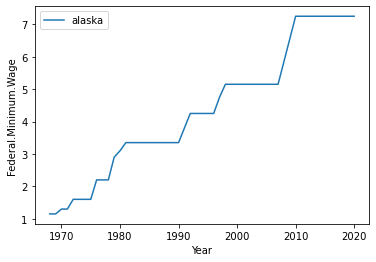

In [16]:
df_alaska = df[df["State"]=="Alaska"]
df_cal = df[df.State=="California"]
sns.lineplot(df_alaska.Year,df['Federal.Minimum.Wage'],ci=None)
plt.legend(["alaska","california"])
plt.show()

In [19]:
df.head()

,Unnamed: 0,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,0,1968,Alabama,0.00000,0.00,1.15,8.55,1.15,8.55,34.8,...,0.00000,0.00,0.00000,0.00,NaN
1,1,1968,Alaska,2.10000,15.61,1.15,8.55,2.10,15.61,34.8,2.1,2.10000,15.61,2.10000,15.61,NaN
2,2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.8,18.72 - 26.40/wk(b),0.46800,3.48,0.66000,4.91,(b)
3,3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.8,1.25/day(b),0.15625,1.16,0.15625,1.16,(b)
4,4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.8,1.65(b),1.65000,12.26,1.65000,12.26,(b)


In [30]:
df_s = df.groupby(['Year','State'])['Federal.Minimum.Wage','Effective.Minimum.Wage'].sum()
df_s

<ipython-input-30-1694d49f7f8f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_s = df.groupby(['Year','State'])['Federal.Minimum.Wage','Effective.Minimum.Wage'].sum()


Federal.Minimum.Wage  Effective.Minimum.Wage
Year State                                                      
1968 Alabama                        1.15                    1.15
     Alaska                         1.15                    2.10
     Arizona                        1.15                    1.15
     Arkansas                       1.15                    1.15
     California                     1.15                    1.65
...                                  ...                     ...
2020 Virginia                       7.25                    7.25
     Washington                     7.25                   13.50
     West Virginia                  7.25                    8.75
     Wisconsin                      7.25                    7.25
     Wyoming                        7.25                    7.25

[2862 rows x 2 columns]